In [13]:
# importing dependencies
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [14]:
# read in CSV data
df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/ML Resources/Cleaned_Crude_Oil_Dataset.csv')
df.head()

,Date,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1/1/1986,23.0,283248,498728,12583,15459,14639,820,81.4,22.9
1,2/1/1986,15.5,256855,453209,12068,15485,14538,947,77.9,15.5
2,3/1/1986,12.6,279413,504565,11759,15485,14517,968,75.9,12.6
3,4/1/1986,12.8,265917,478339,12603,15473,14550,923,81.5,12.8
4,5/1/1986,15.3,273964,495789,13314,15484,14805,679,86.0,15.4


In [15]:
# viewing datatypes
df.dtypes

Date                                                                object
Cushing, OK Crude Oil Future Contract ($/Bar.)                     float64
U.S. Field Production of Crude Oil (1k Bar.)                         int64
Product Supplied of Crude Oil and Petroleum Products (1k Bar.)       int64
Gross Inputs to Refineries (1k Bar./Day)                             int64
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)      int64
Operating Crude Oil Distillation Capacity (1k Bar./Day)              int64
Idle Crude Oil Distillation Capacity (1k Bar./Day)                   int64
Percent Utilization of Refinery Operable Capacity                  float64
Cushing, OK WTI Spot Price FOB ($/Bar.)                            float64
dtype: object

In [16]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# retrieving number of observations
len(df)

430

In [18]:
# renaming columns to fit naming conventions of prophet
df.rename(columns={'Date': 'ds', 'Cushing, OK Crude Oil Future Contract ($/Bar.)': 'y', 'U.S. Field Production of Crude Oil (1k Bar.)': 'total_production', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)': 'product_supplied', 'Percent Utilization of Refinery Operable Capacity': 'operable_capacity_utilization' }, inplace=True)


In [19]:
# confirming column name changes
df.dtypes

ds                                                                 datetime64[ns]
y                                                                         float64
total_production                                                            int64
product_supplied                                                            int64
Gross Inputs to Refineries (1k Bar./Day)                                    int64
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)             int64
Operating Crude Oil Distillation Capacity (1k Bar./Day)                     int64
Idle Crude Oil Distillation Capacity (1k Bar./Day)                          int64
operable_capacity_utilization                                             float64
Cushing, OK WTI Spot Price FOB ($/Bar.)                                   float64
dtype: object

In [20]:
# saving copy of pre-transformation WTI future prices
df_original = df

In [21]:
df.head()

,ds,y,total_production,product_supplied,Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),operable_capacity_utilization,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1986-01-01,23.0,283248,498728,12583,15459,14639,820,81.4,22.9
1,1986-02-01,15.5,256855,453209,12068,15485,14538,947,77.9,15.5
2,1986-03-01,12.6,279413,504565,11759,15485,14517,968,75.9,12.6
3,1986-04-01,12.8,265917,478339,12603,15473,14550,923,81.5,12.8
4,1986-05-01,15.3,273964,495789,13314,15484,14805,679,86.0,15.4


In [22]:
# logarithmic transformation to make data stationary/standardized
df['y'] = np.log(df['y'])
df['Operating Crude Oil Distillation Capacity (1k Bar./Day)'] = np.log(df['Operating Crude Oil Distillation Capacity (1k Bar./Day)'])
df['Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)'] = np.log(df['Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)'])
df.head()

,ds,y,total_production,product_supplied,Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),operable_capacity_utilization,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1986-01-01,3.135494,283248,498728,12583,9.645947,9.591444,820,81.4,22.9
1,1986-02-01,2.740840,256855,453209,12068,9.647627,9.584521,947,77.9,15.5
2,1986-03-01,2.533697,279413,504565,11759,9.647627,9.583076,968,75.9,12.6
3,1986-04-01,2.549445,265917,478339,12603,9.646852,9.585346,923,81.5,12.8
4,1986-05-01,2.727853,273964,495789,13314,9.647563,9.602720,679,86.0,15.4


In [23]:
# building the model 
m = Prophet(seasonality_mode='multiplicative')
m.add_regressor('Operating Crude Oil Distillation Capacity (1k Bar./Day)')
m.add_regressor('Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)')

In [24]:
# fit model, building out future dataframe and setting prediction parameters
m.fit(df)

future_data = m.make_future_dataframe(periods=12,freq='M')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
df2 = df.append(df)
df2 = df.rename(columns={'Cushing, OK Crude Oil Future Contract ($/Bar.)': 'y', 'date':'ds'})
future_data=df2[['ds', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)']]

In [30]:
forecast_data = m.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)_lower,Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)_upper,Operating Crude Oil Distillation Capacity (1k Bar./Day),...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1986-01-01,2.710528,2.547912,3.114005,2.710528,2.710528,0.002530,0.002530,0.002530,0.047577,...,0.047480,0.047480,0.047480,-0.002628,-0.002628,-0.002628,0.0,0.0,0.0,2.839223
1,1986-02-01,2.712506,2.571940,3.127859,2.712506,2.712506,0.002479,0.002479,0.002479,0.050517,...,0.047047,0.047047,0.047047,-0.005949,-0.005949,-0.005949,0.0,0.0,0.0,2.840121
2,1986-03-01,2.714293,2.561405,3.131723,2.714293,2.714293,0.002479,0.002479,0.002479,0.051131,...,0.048162,0.048162,0.048162,-0.005449,-0.005449,-0.005449,0.0,0.0,0.0,2.845018
3,1986-04-01,2.716272,2.585110,3.151660,2.716272,2.716272,0.002503,0.002503,0.002503,0.050167,...,0.054528,0.054528,0.054528,0.001858,0.001858,0.001858,0.0,0.0,0.0,2.864385
4,1986-05-01,2.718187,2.582568,3.149735,2.718187,2.718187,0.002481,0.002481,0.002481,0.042789,...,0.054065,0.054065,0.054065,0.008794,0.008794,0.008794,0.0,0.0,0.0,2.865144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,2021-06-01,4.032345,3.627759,4.192786,4.032345,4.032345,-0.002309,-0.002309,-0.002309,-0.038058,...,-0.028370,-0.028370,-0.028370,0.011997,0.011997,0.011997,0.0,0.0,0.0,3.917946
426,2021-07-01,4.027956,3.643380,4.229926,4.027956,4.027956,-0.002310,-0.002310,-0.002310,-0.038840,...,-0.027515,-0.027515,-0.027515,0.013636,0.013636,0.013636,0.0,0.0,0.0,3.917129
427,2021-08-01,4.023421,3.611028,4.213999,4.023421,4.023421,-0.002312,-0.002312,-0.002312,-0.038153,...,-0.023885,-0.023885,-0.023885,0.016580,0.016580,0.016580,0.0,0.0,0.0,3.927320
428,2021-09-01,4.018886,3.790968,4.382650,4.018886,4.018886,-0.002312,-0.002312,-0.002312,0.015169,...,0.017326,0.017326,0.017326,0.004468,0.004468,0.004468,0.0,0.0,0.0,4.088516


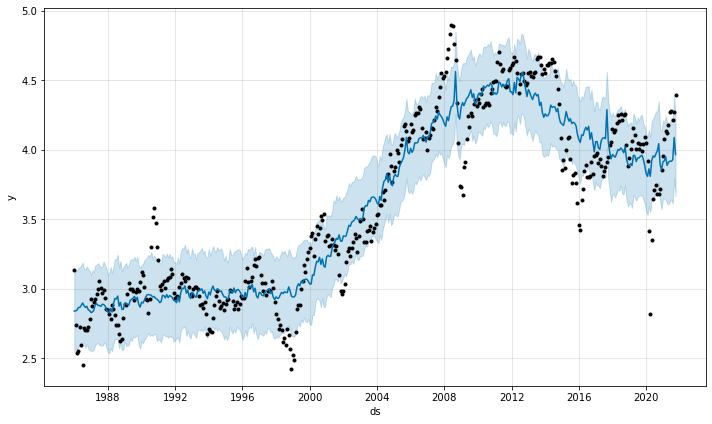

In [32]:
#initial visualization of model results
model_visualization = m.plot(forecast_data)

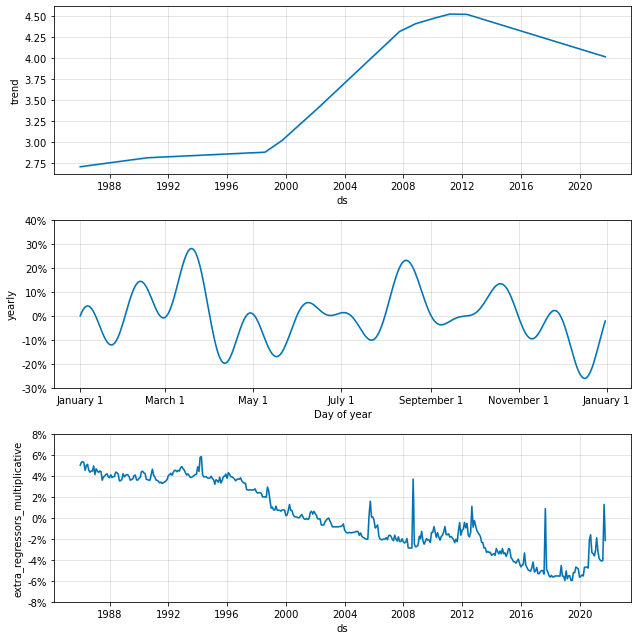

In [33]:
# plotting forecast components
forecast_components = m.plot_components(forecast_data)

In [42]:
# saving transformed forecast data
forecast_data_original = forecast_data 

# reversing logarithmic transformation for real price predications
forecast_data_original['y'] = np.exp(forecast_data_original['y'])
forecast_data_original['yhat'] = np.exp(forecast_data_original['yhat'])
forecast_data_original['yhat_lower'] = np.exp(forecast_data_original['yhat_lower'])
forecast_data_original['yhat_upper'] = np.exp(forecast_data_original['yhat_upper'])

KeyError: 'y'

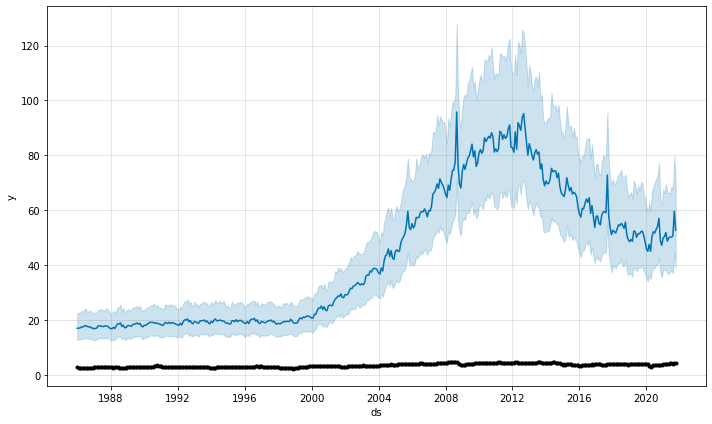

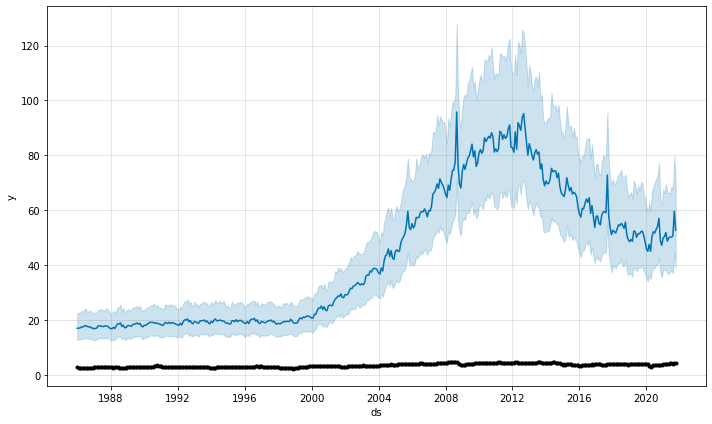

In [37]:
# plotting real price forecasts
m.plot(forecast_data_original)

In [38]:
#comparing initial projections to test data
df_crossval = cross_validation(m, initial='1825 days', period='180 days', horizon = '365 days')
df_crossval.head()

df_mtrcs = performance_metrics(df_crossval)
df_mtrcs.head()

INFO:prophet:Making 61 forecasts with cutoffs between 1991-03-08 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/61 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,0.075361,0.274520,0.205226,0.057708,0.046393,0.056524,0.616438
1,39 days,0.076756,0.277049,0.207450,0.058002,0.046705,0.057055,0.607306
2,40 days,0.072929,0.270054,0.201164,0.055929,0.046393,0.055243,0.621005
3,41 days,0.075052,0.273956,0.204725,0.057079,0.046393,0.056653,0.616438
4,42 days,0.074909,0.273695,0.204345,0.057065,0.045691,0.056640,0.616438


In [39]:
df_mtrcs

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,0.075361,0.274520,0.205226,0.057708,0.046393,0.056524,0.616438
1,39 days,0.076756,0.277049,0.207450,0.058002,0.046705,0.057055,0.607306
2,40 days,0.072929,0.270054,0.201164,0.055929,0.046393,0.055243,0.621005
3,41 days,0.075052,0.273956,0.204725,0.057079,0.046393,0.056653,0.616438
4,42 days,0.074909,0.273695,0.204345,0.057065,0.045691,0.056640,0.616438
...,...,...,...,...,...,...,...,...
294,360 days,0.153644,0.391974,0.315758,0.088583,0.079324,0.086236,0.424658
295,362 days,0.155609,0.394473,0.319487,0.089767,0.079324,0.087372,0.415525
296,363 days,0.160242,0.400303,0.328486,0.093099,0.079490,0.090341,0.392694
297,364 days,0.163045,0.403788,0.328642,0.093671,0.079490,0.090819,0.410959


In [41]:
# Calculate mean absolute percentage error (MAPE)
mape_avg = np.mean(100 * (df_mtrcs['mape']))
avg_accuracy = 100 - mape_avg

print("Accuracy:", round(avg_accuracy, 2), "%.")

Accuracy: 92.68 %.
